ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

AttributeError: 
This plotter has not yet been setup and rendered with ``show()``.
Consider setting ``off_screen=True`` for off screen rendering.


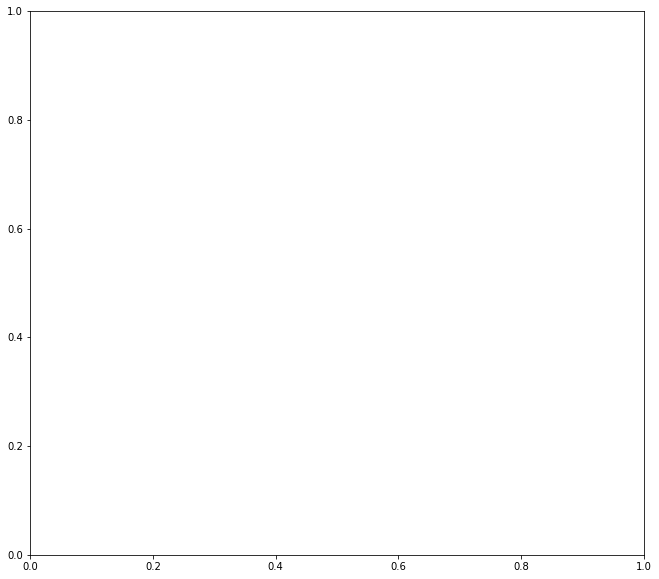

In [3]:
# -*- coding: utf-8 -*-
"""

Created on 24/03/22

Modelling using PyVista

Author: Patrick Munnelly

"""

# Import packages:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp
import pyvista as pv


################################################################
# Define time data and initial conditions:
dt = 0.01
t_test = np.arange(0, 10, dt)  # Time range to integrate over
X0 = [-8, 8, 27]  # Initial Conditions

################################################################
# Define model system paramaters:
sigma = 7.2
rho = 25
beta = 8/3

################################################################
# Define Lorenz system:

def lorenz(t, x):
    return [
        sigma*(x[1] - x[0]),
        x[0]*(rho - x[2]) - x[1],
        x[0]*x[1] - beta*x[2]
    ]
    
################################################################
# Solve our equations using solve_ivp:
sol = solve_ivp(lorenz, (t_test[0], t_test[-1]), X0, method='BDF', t_eval=t_test) # Integrate
x_test = np.transpose(sol.y)

###########################################################################################################
# Create Poincare section of each of our 3D plots
###########################################################################################################
# Set up main figure:
fig = plt.figure(figsize= (11, 10))

################################################################
# 1st plot (x,y,z)

# Fit a spline to connect our data points and then create a 3D mesh:
spline1 = pv.Spline(x_test[0::20,[0,1,2]],len(x_test))
mesh1 = pv.PolyData(x_test[:,[0,1,2]], lines=spline1.lines)
#mesh1.plot(render_lines_as_tubes=True, line_width=5)
# We define a plane with a normal and an origin:
slices1 = mesh1.slice(normal= 'y', origin=(0,0,20))

# Create a plot:
plotter1 = pv.Plotter(off_screen=True)

# Add our slice to the plot:
plotter1.add_mesh(slices1,color='red')

# Set visualisation paramaters:
plotter1.set_background('white')
plotter1.camera_position='yx'
plotter1.show_grid(color='black', xlabel='x', ylabel='y', zlabel='z')
plotter1.show(screenshot='fig1.png')

# Add to main figure:
fig.add_subplot(111)
plt.imshow(plotter1.image)
plt.title('Plane of x VS y VS z')
plt.axis('off')
